# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\tanzi\\Desktop\\Hackathon\\Online-Retail-Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\tanzi\\Desktop\\Hackathon\\Online-Retail-Analysis'

In [5]:
processed_data_dir = os.path.join(current_dir, 'data_set/processed') # path directory

# Imports

In [6]:
import numpy as np #import numpy
import pandas as pd #import pandas
import matplotlib.pyplot as plt #import matplotlib
import seaborn as sns #import seaborn
import plotly.express as px # import plotly
sns.set_style('whitegrid') #set style for visuals

# Loading the data

In [7]:
df = pd.read_csv(os.path.join(processed_data_dir, 'processed_data.csv')) # load data

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Transaction_Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Monthly Trend Analysis

- Creating unique dataset copy to use for visualisations

In [8]:
df_monthlytrend = df.copy()

df_monthlytrend

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Transaction_Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
532100,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
532101,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
532102,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
532103,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


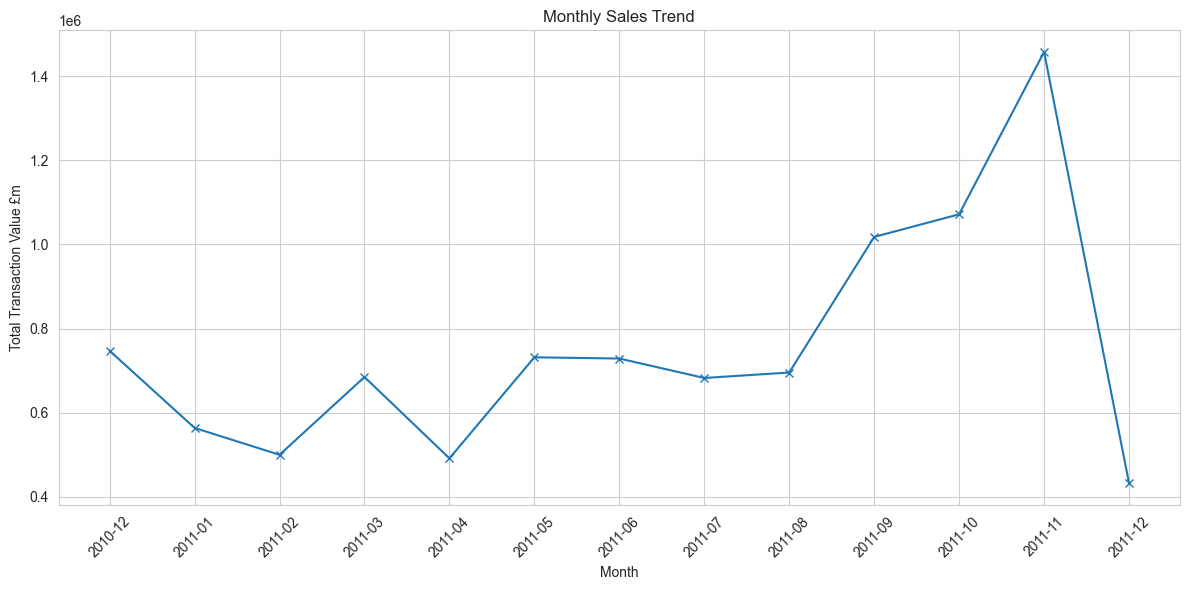

In [9]:
df_monthlytrend['InvoiceDate'] = pd.to_datetime(df_monthlytrend['InvoiceDate']) #convert into datetime format

df_monthlytrend['Month'] = df_monthlytrend['InvoiceDate'].dt.to_period('M').astype(str) #converting the format to just year and month

monthly_sales = df_monthlytrend.groupby('Month')['Total_Transaction_Value'].sum().reset_index() #grouping month with total transaction value per month

plt.figure(figsize=(12, 6)) #size
plt.plot(monthly_sales['Month'], monthly_sales['Total_Transaction_Value'], marker='x') #plot line graph with the marker of x at each month point
plt.title('Monthly Sales Trend') #title
plt.xlabel('Month') #label
plt.ylabel('Total Transaction Value £m') #label
plt.xticks(rotation=45) #rotate label
plt.tight_layout()
plt.show()

Above illustrates the monthly total transaction values from December 2010 through December 2011.

Key insights for monthly trend analysis:

- There is a decline in January 2011, likely reflecting a post-holiday slowdown after seasonal shopping in December.

- Sales remain relatively flat between Q1-Q2 (Jan - June 2011) to slightly increasing, hovering between £0.5m–£0.75m. The pattern shows moderate recovery, but with some dips. This may be due to seasonal or inventory cycles.

- From July to August 2011, sales stabilise, however September sees a sharp increase with continued growth in October and significant peak in November 2011. November reaches the highest point above £1.5m.

- The second half of 2011 shows much stronger performance than the first.

- The November 2011 spike is a key highlight which suggest pre-holiday shopping/ promotional end of year events and customers preparing for the end of year holiday (Christmas/black friday and similar events). December seems to drop heavily which may be due to a cool down period for customers as majority of the shopping has been completed for the season. 

- Possible reasons in decline may be due to seasonality habits, stock out issues, operational disruptions (logistics and distribution closures and delays).

Conclusion:

The trend analysis chart reveals a gradual buildup in sales activity throughout the year, peaking in a sharp surge during Q4 2011, particularly in November, which may correspond with seasonal or promotional factors. Companies tend to run aggressive marketing campaigns and discounts in the second half of the year to ensure inventory is cleared out, boost end of year financials and capture seasonal customers. 

Overall, the trend suggests a positive sales trajectory with strong year-end performance, indicating potential for future seasonal marketing opportunities and optimised inventory management.

---

# Section 2

Section 2 content

In [10]:
df_product = df.copy()

df_product

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Transaction_Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
532100,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
532101,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
532102,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
532103,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In order to identify the most popular products by sales volume so that inventory can be optimised.

In [ ]:
top_products = df_product.groupby('Description')['Quantity'].sum().nlargest(10)
top_products #top 10 products based on quantity sold


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64

In [ ]:
# Top 10 products by quantity
top_products_list = [
    "WORLD WAR 2 GLIDERS ASSTD DESIGNS",
    "JUMBO BAG RED RETROSPOT",
    "POPCORN HOLDER",
    "ASSORTED COLOUR BIRD ORNAMENT",
    "PACK OF 72 RETROSPOT CAKE CASES",
    "WHITE HANGING HEART T-LIGHT HOLDER",
    "RABBIT NIGHT LIGHT",
    "MINI PAINT SET VINTAGE",
    "PACK OF 12 LONDON TISSUES",
    "PACK OF 60 PINK PAISLEY CAKE CASES"
]
filtered_df = df[df["Description"].isin(top_products_list)]
filtered_df
filtered_df['Description'].unique()
# Calculate revenue for each product
top_products_revenue = filtered_df.groupby("Description")["Total_Transaction_Value"].sum().sort_values(ascending=False)
top_products_revenue
#create a comparison dataframe
comparison_df = pd.DataFrame({
    "Product Description": top_products_list,
    "Quantity Sold": top_products.reindex(top_products_list).values,
    "Revenue (£)": top_products_revenue.reindex(top_products_list).values
})
comparison_df # there are some NaN values because some products in the top 10 by quantity do not appear in the top 10 by revenue
                #so dropped those rows and now we compare only those products which are in both top 10 lists
comparison_df=comparison_df.dropna()
comparison_df
comparison_melted = comparison_df.melt(
    id_vars="Product Description",
    value_vars=["Quantity Sold", "Revenue (£)"],
    var_name="Metric",
    value_name="Value"
)

In [ ]:
fig = px.histogram(
    x=top_products.index,   # Descriptions
    y=top_products.values,  # Quantities
    title="Top 10 Products by Quantity",
    labels={"x": "Product Description", "y": "Total Quantity Sold"} 
)
fig.show()

In [ ]:
fig = px.bar(
    comparison_melted,
    x="Product Description",
    y="Value",
    color="Metric",
    barmode="group",  # side-by-side bars
    text="Value",
    title="Top 10 Products: Quantity vs Revenue"
)

fig.update_traces(texttemplate='%{text:.2f}', textposition="outside")
fig.update_layout(
    xaxis_title="Product Description",
    yaxis_title="Value",
    xaxis_tickangle=-45,
    legend_title="Metric"
)

fig.show()

---

it is inferred that the highest selling products are not necessarily the highest revenue generating products. This insight can help the business to balance inventory levels, ensuring that both high-demand and high-revenue products are adequately stocked to meet customer needs and maximise profitability.

# Section 3

Section 3 content

---

# Customer Spending Analysis

Section 4 content

In [11]:
pd.set_option("display.float_format", "{:,.2f}".format)

# group customers by CustomerID
df_customer_spending = df.copy()

df_customer_spending = df_customer_spending.groupby('CustomerID').agg({
    'Total_Transaction_Value': 'sum',  # Total spending per customer
    'InvoiceNo': 'count'               # Number of transactions per customer
}).reset_index()

df_customer_spending['Avg_Order_Value'] = (
    df_customer_spending['Total_Transaction_Value'] / df_customer_spending['InvoiceNo'].replace(0, pd.NA)
)

# sort by average order value
df_customer_spending = df_customer_spending.sort_values(by='Avg_Order_Value', ascending=True)

# remove customers with total transaction value less than or equal to 0
df_customer_spending = df_customer_spending[df_customer_spending['Total_Transaction_Value'] > 0]
df_customer_spending = df_customer_spending[df_customer_spending['Avg_Order_Value'] > 0]


# format the numbers to 2 decimal places
df_customer_spending.style.format({
    "Total_Transaction_Value": "{:,.2f}",
    "Avg_Order_Value": "{:,.2f}"
})

df_customer_spending['CustomerID'] = df_customer_spending['CustomerID'].astype(str)

df_customer_spending

,CustomerID,Total_Transaction_Value,InvoiceNo,Avg_Order_Value
211,12607,0.00,202,0.00
1056,13762,0.00,14,0.00
168,12558,0.00,22,0.00
89,12454,0.00,30,0.00
4200,18072,12.24,34,0.36
...,...,...,...,...
2517,15749,"21,535.90",15,"1,435.73"
3090,16532,"6,748.80",4,"1,687.20"
601,13135,"3,096.00",1,"3,096.00"
2100,15195,"3,861.00",1,"3,861.00"


In [12]:
fig = px.scatter(
    df_customer_spending,
    x="InvoiceNo",
    y="Avg_Order_Value",
    size="Total_Transaction_Value",
    hover_data=["CustomerID", "Total_Transaction_Value", "InvoiceNo", "Avg_Order_Value"],
    labels={
        "InvoiceNo": "Number of Transactions",
        "Avg_Order_Value": "Average Order Value (£)",
        "Total_Transaction_Value": "Total Spend (£)"
    },
    title="Customer Segmentation: Frequency vs Average Spend",
    template="plotly_white",
    size_max=50
)
fig.update_xaxes(type="log")
fig.update_yaxes(type="log")
fig.show()


---

# Sales Analysis UK vs RoW

Below chart dispays sales analysis from the UK vs the rest of the world

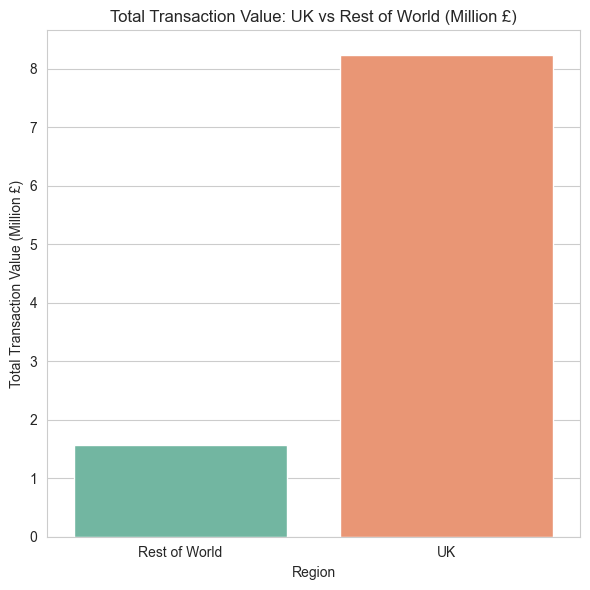

In [13]:

country_sales = df.groupby('Country')['Total_Transaction_Value'].sum().reset_index()
country_sales['Region'] = country_sales['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Rest of World')
region_sales = country_sales.groupby('Region')['Total_Transaction_Value'].sum().reset_index()
region_sales['Total_Transaction_Value_Million'] = region_sales['Total_Transaction_Value'] / 1_000_000

plt.figure(figsize=(6,6))
sns.barplot(data=region_sales, x='Region', y='Total_Transaction_Value_Million', palette='Set2', hue='Region')
plt.title('Total Transaction Value: UK vs Rest of World (Million £)')
plt.ylabel('Total Transaction Value (Million £)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


In [14]:
plt.savefig("Images/uk_vs_rest_of_world.png")

<Figure size 640x480 with 0 Axes>

Key insights;

- Uk ilustrates higher transation valus over 8 million £
- Rest of the world has lower transation value, just below 2 million £

Conclusion;

The Uk dominates the transation value, contributing roughtly five times more than the rest of the world. This highlight the Uk as the primary market or source or revenue with the rest of the world contributing to relatively less. There is scope for marketing campaigns for the rest of the world to help with increased revenue and exposure opportunties could also lie within the UK to further increase revenue as this is the strongest market.





# Section 6


In [15]:
#adding Hour and am_or_pm columns
am_or_pm=df.copy()
am_or_pm['Hour'] = am_or_pm['InvoiceDate'].str[11:13]
am_or_pm['AmPm'] = am_or_pm["Hour"].apply(lambda x: 'AM' if int(x) < 12 else 'PM')

In [16]:
# create a pie chart for Am vs Pm sales
ampm_sales = am_or_pm.groupby('AmPm')['Total_Transaction_Value'].sum().reset_index()
fig = px.pie(ampm_sales, values='Total_Transaction_Value', names='AmPm', title='Sales Distribution Am vs Pm')
fig.show()

In [17]:
#create a bar chart for sales by hour
hourly_sales = am_or_pm.groupby('Hour')['Total_Transaction_Value'].sum().reset_index()
fig = px.bar(hourly_sales, x='Hour', y='Total_Transaction_Value', title='Sales by Hour', labels={'Total_Transaction_Value': 'Total Sales', 'Hour': 'Hour of Day'})
fig.show()  

Key insights:
- 63.7% of the revenue comes during the PM time.
- The highest peaks occurring around 10 AM and 12 PM.

Conclusions:
Most of the revenue (63.7%) comes during the PM time of the day, highlighting that evenings generate the majority of sales. However, a closer look at the hourly distribution reveals that sales activity is actually strongest between 9 AM and 4 PM, with clear peaks around 10 AM and 12 PM before gradually declining in the late afternoon and evening This shows that late morning to early afternoon drives the highest activity, making it the best time to focus business efforts.

In [18]:
#create a column is it a weekend or weekday
am_or_pm['InvoiceDate'] = pd.to_datetime(am_or_pm['InvoiceDate'])
am_or_pm['DayOfWeek'] = am_or_pm['InvoiceDate'].dt.day_name()
am_or_pm['DayType'] = am_or_pm['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')


In [19]:
# create a pie chart for Weekend vs Weekday sales
daytype_sales = am_or_pm.groupby('DayType')['Total_Transaction_Value'].sum().reset_index()
fig = px.pie(daytype_sales, values='Total_Transaction_Value', names='DayType', title='Sales Distribution Weekend vs Weekday')
fig.show()  


In [20]:
# create a bar chart for sales by each day of week
dayofweek_sales = am_or_pm.groupby('DayOfWeek')['Total_Transaction_Value'].sum().reset_index()
#order the days of the week
dayofweek_sales['DayOfWeek'] = pd.Categorical(dayofweek_sales['DayOfWeek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
dayofweek_sales = dayofweek_sales.sort_values('DayOfWeek')
fig = px.bar(dayofweek_sales, x='DayOfWeek', y='Total_Transaction_Value', title='Sales by Day of the Week', labels={'Total_Transaction_Value': 'Total Sales', 'DayOfWeek': 'Day of the Week'})
fig.show()  


In [21]:
# check the number of transactions per each day of the week
DayOfWeek = am_or_pm['DayOfWeek'].value_counts()
DayOfWeek


DayOfWeek
Thursday     102128
Tuesday      100193
Monday        93625
Wednesday     92841
Friday        80737
Sunday        62581
Name: count, dtype: int64

Key insights:
- Customers mostly make purchases during the weekdays
- Thursdays have the highest sales revenue per week

Conclusions:
Overall, the charts indicate that most transactions and sales occur on weekdays, with Thursday leading and Sunday trailing, suggesting weekday-focused demand and lighter weekend activity.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [22]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)